In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

In [3]:
from torch_geometric.data import Data, DataLoader
from torch_geometric.datasets import TUDataset, Planetoid
from torch_geometric.nn import GCNConv, Set2Set, GNNExplainer
import torch_geometric.transforms as T
import torch
import torch.nn.functional as F
import os

import matplotlib.pyplot as plt
from dgl.data import BACommunityDataset
import networkx as nx
import torch_geometric
import dgl

In [4]:
from src.model import *
from src.data import *
from src.explainer import *
from src.plot import *
from src.modify import *
from src.protgnn import *

In [5]:
cora_dataset = get_cora_dataset()

In [11]:
ba_dataset = get_dataset("BAShapes")

Done loading data from cached files.


In [12]:
num_classes = len(set([int(i) for i in ba_dataset.y]))
num_features = ba_dataset.x.shape[-1]

In [20]:
epochs = 200
dim = 16

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(num_features=num_features, dim=dim, num_classes=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-3)


In [14]:
num_classes, num_features

(4, 1)

In [16]:
cora_dataset.x.shape

torch.Size([2708, 1433])

In [17]:
model = train_model(epochs,model,device,ba_dataset,optimizer,test_model)

[Train_loss:1.204650 Train_acc: 0.6304, Test_acc: 0.6643]: 100%|██████████████████████████████████████████████| 100/100 [00:00<00:00, 260.69it/s]


In [18]:
num_classes = len(set([int(i) for i in cora_dataset.y]))
num_features = cora_dataset.x.shape[-1]

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(num_features=num_features, dim=dim, num_classes=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-3)


In [22]:
model = train_model(epochs,model,device,cora_dataset,optimizer,test_model)

[Train_loss:1.601200 Train_acc: 0.4233, Test_acc: 0.4380]: 100%|███████████████████████████████████████████████| 200/200 [00:02<00:00, 71.47it/s]


In [23]:
explainer = GNNExplainer(model, epochs=200)

In [25]:
node_feature_mask, edge_mask = explain_model(explainer,cora_dataset,10)

Explain node 10: 100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 794.32it/s]


In [26]:
gce_explainer = GCExplainer()

In [27]:
gce_explainer.learn_prototypes(model,cora_dataset)

/rds/user/njr61/hpc-work/anaconda3/envs/gnn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
gce_explainer.get_prediction(model,cora_dataset)

array([3, 3, 3, ..., 1, 3, 3])

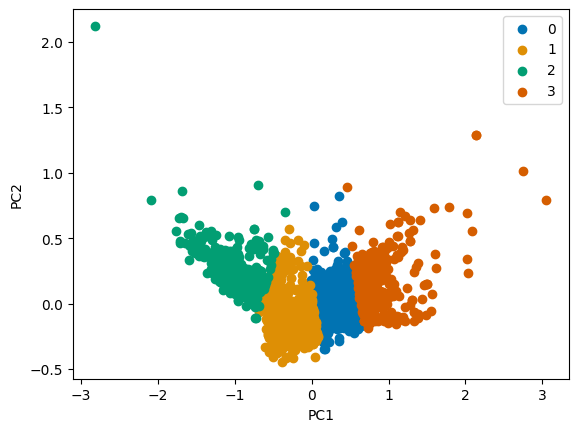

In [30]:
plot_kmeans_clusters(gce_explainer.kmeans,gce_explainer.initial_activations)

In [31]:
gce_explainer.get_prediction(model,identity(cora_dataset))

array([3, 3, 3, ..., 1, 3, 3])

In [32]:
model = GCNNet_NC(num_features, num_classes, model_args)

In [34]:
cora_dataset.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

In [36]:
model = train_model(epochs,model,device,cora_dataset,optimizer,test_model,protgnn=True)

[Train_loss:0.235984 Train_acc: 0.1294, Test_acc: 0.1020]: 100%|███████████████████████████████████████████████| 200/200 [00:21<00:00,  9.40it/s]


In [37]:
prot_explainer = ProtGNNExplainer()

In [39]:
prot_explainer.learn_prototypes(model,cora_dataset)

In [41]:
prot_explainer.get_prediction(model,cora_dataset)

array([3, 3, 3, ..., 3, 3, 3])